<a href="https://colab.research.google.com/github/vlada-kazantsevaa/homeworks/blob/main/Homeworks/hw-1/HW_1_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This homework will:
* Remind you how to ~google~ learn and navigate in previously unknown topics
* Show you how to create paper-ready plots in Python
* Sharpen your skills in data analysis and making educated guesses

As mentioned earlier, we expect you to be familiar with Python's trivial syntax, idioms, and constructs, or learn them on the fly.

**Notes:**
* Check github page for more info on how to submit homework.
* We will be using matplotlib as our main graphics library. If for any reason you don't like this package feel free to use other solutions.
* Write answers directly in the Colab/Jupyter Notebook, `.ipynb` file is the only acceptable form of homework report.
* There are scores provided near each section (sometimes near specific tasks too). The maximum score for HW is 10, but you **don't** have to do everything. Remember, in HSE 8 is also an excellent result.
* To get full points for a section you should complete all tasks and answer all questions in it.
* The code in each cell is just a recommendation. Feel free to write your own implementation that does the same, or follow hints that I left for you.
* Better to write at least some answers, then skip the homework completely.
* If you copy your friend's/LLM's answers, that's bad, but we can't reliably control it. At the very least understand each line of code and retype it yourself with a different structure. **Direct or naive plagiarism will be punished according to the HSE rules.**

Don't forget to submit the feedback! Especially if the homework was too difficult or easy for you.

# About

The following homework will contain two separate cases. Both are dedicated to improve your skills in data analysis.

- The first case is about more human-readable diabetes dataset that we've already encountered on one of our seminars. There are almost no hints given, but you can reuse code from seminars.

- The second case is more of a bioinformatic analysis, where you will work RNA-seq data. It will showcase the preparation of some QC-specific (Quality Control, more on that later) plots, however most of them are considered extra in this work.

And remember: extra tasks are optional, those points can also be obtained by answering questions at lectures.

# Case I: Diabetes Dataset Analysis (4 points)

In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np

For this work, we will use one of the "toy" datasets from the sklearn library, containing information about 442 patients with diabetes.

Access to datasets from sklearn can be done through built-in functions; downloading external files is not required.

Let's load the dataset and read its description:

In [4]:
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Note that this is not the original dataset; the original features have already been processed:


```
Each of these 10 feature variables have been mean centered and scaled by
the standard deviation times the square root of `n_samples`
```
For the current assignment, this is not suitable for us, which is why we will download the original data. You can find them by following the link indicated in the description under the ```Source URL``` line. However, for convenience, below is a cell that downloads the file automatically (you can use ```wget```, but it doesn't always work from Jupyter).

In [5]:
import requests # if the library is missing, install via pip install

url = 'https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt'

response = requests.get(url)
if response.status_code == 200:
    with open('diabetes.tab.txt', 'wb') as file:
        file.write(response.content)
    print("You downloaded diabetes dataset")
else:
    print("Diabetes dataset was NOT loaded, please do it manually")

You downloaded diabetes dataset


In [6]:
# Specify the file path here
filepath = "diabetes.tab.txt"
df = pd.read_table(filepath)

Now we can proceed directly to practice.

## [1.5] Dataset exploration

Display the first and last five rows of the dataset:

In [9]:
print('first five rows')
display(df.head())
print('last five rows')
display(df.tail())

first five rows


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


last five rows


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220
441,36,1,19.6,71.00,250,133.2,97.0,3.00,4.5951,92,57


We observe that some features have conditional names ```s#```.

Rename these columns according to the dataset description that you can find on dedicated sklearn page(tc, ldl, ...)

In [13]:
''' - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level '''

df = df.rename(columns={
    'S1':'tc',
    'S2':'ldl',
    'S3':'hdl',
    'S4':'tch',
    'S5':'ltg',
    'S6':'glu'
})
df.head()

,AGE,SEX,BMI,BP,tc,ldl,hdl,tch,ltg,glu,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


Display the data type of each column:

In [14]:
df.dtypes

,0
AGE,int64
SEX,int64
BMI,float64
BP,float64
tc,int64
ldl,float64
hdl,float64
tch,float64
ltg,float64
glu,int64


Display information about the dataset using `df.info()`. Make sure there are no `NaN` values. Count the number of `NaN` values manually using the functions `.isna()` and `.sum().`

In [ ]:
# ...

The variable `sex` contains encoded notations for gender: `1` and `2`.
The dataset description does not specify which genders are implied by which number.
For convention, let's assume that 1 - female, 2 - male.

Let's rename them accordingly. In the `sex` column, replace the values `1` with `female`, `2` with `male`.

In [ ]:
# ...

Answer the following questions by calculating the corresponding statistics:

- How many people have BMI above 30?

- How many men have BMI above 30?

- Calculate the average BMI for each gender using the `groupby()` method.

- How many women over 60 have blood pressure above the average blood pressure of all women?

In [ ]:
# ...

## [1.5] Data Visualization

Display on a graph the distribution of `BMI` for men and women separately. For now, you don't need to import `matplotlib` if you use the built-in `hist` method in pandas. Make the graphs readable and neat: for example, the `BMI` distributions by `gender` will overlap, so make them semi-transparent (find in the documentation which parameter is responsible for this). Also add a legend.

In [ ]:
# ...

Looking at the resulting distributions, can we say that there are empirical differences between them? If yes, what are they? How could this be verified statistically?

Your answer: `...`

Now, using the `matplotlib` library, create a scatterplot showing the dependence of blood pressure on BMI. Highlight those people whose glucose level exceeds the median for the dataset (for example, with a separate color of points and/or a bold outline).
Don't forget to add:

* Legend

* Plot title

* Axis labels

* Grid

In [ ]:
# ...

Using the `plt.subplots` method, build histograms for all 10 features from the dataset (do not include the target column `Y`):

In [ ]:
# ...

## [1] Age Group Analysis

Split the `Age` variable into bins, for example, using `pd.cut`. The result should be a new categorical feature (a column in the dataframe) reflecting different age groups (e.g., 18-30, 31-40, 41-50, etc.). Make sure you include all ages (there should be no `NaNs` in the new column).

In [ ]:
# You should have both a list with bin boundaries and names for the bins
bins = ...
labels = ...
df['Age_Group'] = pd.cut(...)

Create a violinplot showing the distribution of glucose levels for the age groups obtained above.

In [ ]:
# ...

Are there noticeable differences in obtained distributions?

Your answer: `...`

# Case II: RNA-seq data analysis (4 points)

## [1] Small introduction to RNA-seq

In this case we will work with RNA sequencing data (RNA-seq), the workhorse of modern transcriptome research.

Below we provide a ***short*** introduction to RNA biology and RNA sequencing experiments. This is not exhaustive, but you are expected to be curious, google, and discuss unknown/unclear points in the group. If something cannot be solved ~by the collective mind~ - feel free to write to me or ask questions at the next lesson.

For those interested, here is a list [list](https://github.com/crazyhottommy/RNA-seq-analysis) with additional resources.



---



---



### Molecular biology primer

There are three main molecules inside the cell:
* DNA - where the genetic information is stored. In humans, DNA is stored exclusively in the *nucleus*.
* RNA - that is used to transfer information from the *DNA* (nucleus) to the *cytoplasm*. DNA is *transcribed* to create RNA.
* Proteins are the molecules that do most of the work inside the cell. They are synthesized in the *cytoplasm* on the basis of RNA, this process is known as *translation*.

That is, the ***main*** flow of genetic information is
```DNA -> transcription -> RNA -> translation -> proteins```.
This is called the central dogma of molecular biology. [Youtube](https://www.youtube.com/results?search_query=central+dogma+of+molecular+biology).

We can think of DNA, RNA, and proteins as simple sequences of either nucleic acids or amino acids. In most cases this simplification is sufficient, but keep in mind that DNA/RNA/proteins also have a high level 3D structure that will affect their biological role (and this structure is context dependent and in most cases unknown).

How do cells react to external stimulation? What is the difference between cells of different tissues of the same organism? The answers lie in a set of active genes.That is, genes (=regions of DNA) that are transcribed into RNA and then translated into proteins.

Obviously, biologists are very interested in proteins that are active inside the cell. However, for technical reasons, a direct and reliable study of the cell proteome is impossible. Instead, researchers focus on the previous step, RNA abundance, the total number of RNA copies for a given gene (or its relative concentration).

State-of-the-art technology to measure RNA abundance is called RNA-seq. It consists of two main steps: (1) isolation of RNA from cells of interest (cancer, tissues, cell lines) and (2) *sequencing* of the RNA. Sequencing is the process of determining the RNA sequences in a given sample. Once the RNAs are sequenced, they can be assigned to genes of origin to assess overall gene expression (also known as activity).

Important remarks:
* RNA-seq measures the concentration of RNA in a group of cells (i.e. it is the average of the entire population)
* We assume that the amount of RNA correlates with the production of a given protein.

Both assumptions are somewhat weak in practice, but sufficient for high-level forecasts.

On your molecular biology & bioinformatics classes you wil find that the above picture is a great simplification. However, this will be enough for our purposes.

### Data format

We can **assume** that the result of the RNA-seq experiment is a simple table like this:

|        | Sample 1 | .... | Sample N |
|--------|----------|------|----------|
| Gene 1 | 35       |      | 897      |
| ....   |          |      |          |
| Gene N | 0        |      | 760      |

And the values ​​in each cell indicate the estimated normalized expression of the gene in this sample. This is not a direct number of RNA copies, but a normalized value strongly correlated with it.

For those interested, the normalization of RNA-seq experiments is a very complex topic. We will use TPM values ​​and trust that all basic assumptions remain valid.

### Questions
* [0.2] Why do we use RNA sequencing but don't measure proteins directly? Provide a brief **high-level** description of the major technical reasons.

Your answer: `...`
* [0.2] Why might RNA-seq be a poor indicator of protein abundance?

Your answer: `...`
* [0.2] Give four examples where the transcribed RNA is directly involved in some biological process (i.e., it functions without translation, which violates the central dogma). Give a brief explanation for each example (1 sentence).

Your answer: `...`
* [0.2] What kinds of analyzes can we perform using RNA sequencing data? Describe any two of them in detail.

Your answer: `...`
* [0.2] Imagine that you are studying a group of cells in two conditions. You need to compare their transcriptome between two states and you decide to run RNA sequencing in duplicate (2x2 = 4 samples). What will be the approximate cost of sequencing these samples using the Total RNA-seq protocol in the US? Provide links.

Your answer: `...`



---



---


You are expected to search answers online and discuss with your more experienced colleagues. Just remember to understand and explain everything in your own words.


## [1.5] Data preprocessing

We are going to use pre-processed RNA-seq data from mouse brain cells with 2 genotypes - wild type (WT) and ADAR1-KO (aka knockout/inactive/disrupted ADAR1 gene).

**[1] points in this section is for writing code.**

In [ ]:
# gdown - shell tool to download files from google drive by ID
# ! => run shell command instead of python command
!gdown 1chfNjtLn4szHCko4LO8bjRme6nHipuQk

Downloading...
From: https://drive.google.com/uc?id=1chfNjtLn4szHCko4LO8bjRme6nHipuQk
To: /content/HW-1.TPM.tsv.gz
100% 1.15M/1.15M [00:00<00:00, 123MB/s]


In [ ]:
import pandas as pd
import numpy as np

# Load tab separated HW-1.TPM.tsv.gz file, and create a data frame
# hint: read_csv with sep
df = ...

# Show the first 5 rows
...

,gene_id,gene_name,WT 1,WT 2,WT 3,ADAR1-KO 1,ADAR1-KO 2,ADAR1-KO 3
0,ENSMUSG00000000001,Gnai3,41.497520,36.699438,37.343788,38.061131,37.586224,32.082841
1,ENSMUSG00000000003,Pbsn,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSMUSG00000000028,Cdc45,1.885241,2.411933,1.662913,2.533332,2.380505,2.200205
3,ENSMUSG00000000031,H19,4.660286,2.929563,11.034701,6.114367,37.147375,3.223032
4,ENSMUSG00000000037,Scml2,1.008518,1.175329,0.775612,1.114238,0.891466,0.933327


If this were a completely new project, you must first refine the meaning of each column. In our case:
* `gene_id` - gene id from the [Ensembl database](https://ensembl.org/index.html)
* `gene_name` - name of the gene
* `WT 1/2/3` - estimated expression of the gene in WT samples 1..3
* `ADAR1-KO` - estimated expression of the gene in ADAR1-KO samples

**[0.25]** What is the function of this protein, ADAR1? Check its [gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=ADAR) and provide a short summary (1-2 sentences)

Your answer: `...`


Before continuing, we also need to check that the numeric columns have been parsed correctly and that we don't have any missing values.

In [ ]:
# Print dtypes and make sure that all expression columns are float64
...

gene_id        object
gene_name      object
WT 1          float64
WT 2          float64
WT 3          float64
ADAR1-KO 1    float64
ADAR1-KO 2    float64
ADAR1-KO 3    float64
dtype: object

In [ ]:
# Check that we don't have missing values
# hint: isna with sum
totalna = ...
print("Total NA cells: ", totalna)

# Assert that its actually 0 and provide some message if it's not
...

Total NA cells:  0


The values ​​of the normalized expression in this dataset cannot be less than 0. Let's check if it's true:

In [ ]:
# Select numerical columns
# hint: select_dtypes
numcols = ...
# Assert that the total number of values < 0 is 0
assert ... == 0, \
  "All RNA abundance estimates must be > 0"

Now let's drop genes that are barely expressed:

In [ ]:
# Calculate non-zero quantiles for each expression column
qthr = 0.01
quantiles = []
for col in df[numcols]:
  series = df[col]
  # Select non zero values
  series = ...
  # Calculate quantiles
  q = ...

  quantiles.append(q)

# Print results
for col, q in zip(numcols, quantiles):
  ...

  # assert that quantile is not zero
  ...

WT 1 -> 0.01082312
WT 2 -> 0.01019045
WT 3 -> 0.01016553
ADAR1-KO 1 -> 0.01011308
ADAR1-KO 2 -> 0.00947186
ADAR1-KO 3 -> 0.011762540000000002


In [ ]:
# As a threshold we will use a min quantile
threshold = ...

print("Genes before", df.shape[0])

# We will drop all columns,
# where the expression is below the threshold in all samples
mask = (df[numcols] >= threshold).any(axis=1)
df = ...

print("Genes after", df.shape[0])

Genes before 55414
Genes after 32541


Let's check the genes with the total maximum expression in all samples:

In [ ]:
overallexpr = df[numcols].sum(axis=1)

# New trick:
## sort by index
argsort = overallexpr.argsort()
## select top 25 elements
index = argsort[-15:]

# Print selected genes
# hint: use iloc for indexing using row ids
df.iloc[index]

,gene_id,gene_name,WT 1,WT 2,WT 3,ADAR1-KO 1,ADAR1-KO 2,ADAR1-KO 3
18695,ENSMUSG00000065947,mt-Nd4l,3244.481524,3787.011878,5191.404945,4300.233598,4692.699653,3824.266417
49540,ENSMUSG00000115420,Rmrp,4648.810066,5935.635789,5110.159742,4217.981449,3487.013390,3726.549261
17925,ENSMUSG00000064363,mt-Nd4,4578.895973,4504.075658,5439.584430,5016.570289,5410.107547,5138.580676
17919,ENSMUSG00000064356,mt-Atp8,3451.798433,3194.473193,6608.528970,4569.459389,6933.611236,5597.696083
17923,ENSMUSG00000064360,mt-Nd3,4762.398471,4759.783429,6556.043245,6048.342017,6107.484679,5500.308998
17932,ENSMUSG00000064370,mt-Cytb,7140.148099,7157.130352,7060.157734,7265.976052,7694.228833,7855.445480
17904,ENSMUSG00000064341,mt-Nd1,7689.936568,7120.516366,7850.802297,8494.714554,9201.511742,8645.226517
35986,ENSMUSG00000100862,Gm10925,8668.572102,7631.164943,8472.854381,9178.058135,10870.244060,9758.700512
36227,ENSMUSG00000101111,Gm28437,9590.183503,9092.210924,10351.376384,9470.910668,11953.672795,10212.991929
30928,ENSMUSG00000092837,Rpph1,11583.957861,12935.043219,12466.619806,13130.398621,10852.620645,10056.491107


Obviously, these genes are not outliers due to their **consistently** high expression.

**[0.25]** What gene groups do we have here (hint - at least 2)? Give a brief description for each category.

Your answer: `...`

## [1.5] Quality control

The data is ready, and, fortunately, without obvious problems. Let's focus on some basic quality control (QC) figures.

Several decades ago such plots would have been included in almost all relevant publications. Now the quality of RNA sequencing has improved significantly, and the researchers simply mention that the samples passed the standard quality check.

### PCA

It is a well-known observation that PCA decomposition of expression profiles should group samples according to their origin. In our case, we expect to observe two clusters - KO and WT cells.

The closer the samples are to each other on the PCA plot, the better. However, we are fine as long as the samples can be separated by a straight line.


**[0.5] points in this section is for writing code.**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select expression columns
data = ...
# Transpose the matrix to treat genes as features
data = ...
# Transform to zero mean and unit variance
data = StandardScaler().fit_transform(data)

# first thing is to calculate the PCA decomposition
# hint: don't forget the random state & request 2 components to make a 2D plot
pca = PCA(random_state=32 ...)
pca = ...

samples, coords = pca.shape
print(f"Samples: {samples}")
print(f"Components: {coords}")

Samples: 6
Components: 2


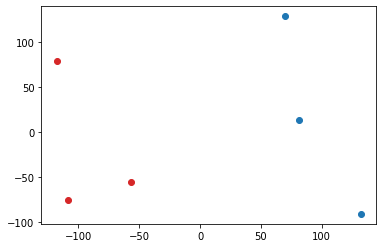

In [ ]:
import matplotlib.pyplot as plt
# colors in HEX format
palette = {"WT": "#1F77B4", "ADAR1-KO": "#D62728"}

# Create a basic draft
fig = plt.figure()
ax = fig.gca()

for (x, y), col in zip(pca, numcols):
  group = "WT" if "WT" in col else "ADAR1-KO"
  color = palette[group]
  ax.scatter(x, y, color=color)

fig.show()

[1.0] Your task is to start with the plot above and reproduce the below version:

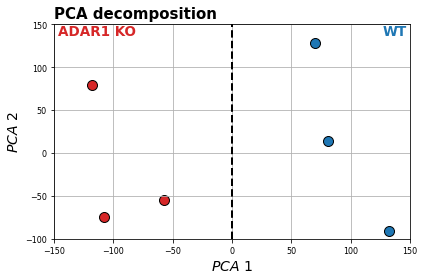

In [ ]:
...

Obviously Colab compresses the image when it shows it to you, which is why it's so "blocky". When preparing figures for this article, you should use vector graphics (for example, matplotlib supports SVG export).

# Extra Tasks (2 Extra Points)

## [1] Expression distribution

Let's have a look at binned distribution of genes expression:

[None]

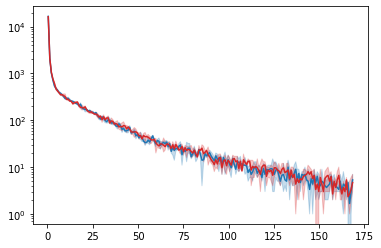

In [ ]:
fig, ax = plt.subplots()

# Let's ignore the highly expressed genes -
# it makes no sense to bin them, since there are only a few of them.
upthr = df[numcols].quantile(0.98).max()

# Create 200 bins ranging from 0 to upthr
# hint: use numpy
bins = ...


# Calculate center of each bin
# hint: slice with step & sum & divide by 2
X = ...

# Plot each genotype
for genotype in "WT", "ADAR1-KO":

  # There are 3 samples of each genotype
  counts = []
  for col in numcols:
    if genotype not in col:
      continue
    # count number of genes in each bin
    c, _ = np.histogram(df[col], bins)
    counts.append(c)

  # Turn list of 1D arrays into dense 2D array
  counts = np.asarray(counts)
  # Calculate stats for each bin
  meanv, minv, maxv = ...

  # Get the color from the palette
  color = ...

  # Plot the mean trend
  ax.plot(...)
  # Shade betweenmin and max
  ax.fill_between(..., color=color, alpha=0.25)

ax.set(yscale='log')

What observations can we make based on this graph? *Hint: right tail.*

Your answer: `...`

Now your task is to use all your skills and embellish this plot just like we did with the PCA figure. For example, be sure to include the legend, title, grid, and axis labels.

In [ ]:
# ...

## [1] Expression heatmap

Now let's visualize the expression of top N genes. First - let's get the data:

In [ ]:
# As before, we will select genes based on their overall expression
sumexpr = ...

topn = 250
# select indices of topn genes with max expression
ind = ...

# get the expression values
expr = ...
expr

,WT 1,WT 2,WT 3,ADAR1-KO 1,ADAR1-KO 2,ADAR1-KO 3
16822,354.666801,378.119043,351.839586,337.193413,332.245688,313.615214
18815,399.123179,370.559682,370.802462,285.393773,358.448513,299.900925
8889,370.760177,371.130393,341.416847,348.605561,352.361944,322.746592
15722,330.728785,300.830754,366.588915,322.513975,403.102266,388.014514
3026,375.038797,349.275206,349.147615,366.439702,349.525445,324.287622
...,...,...,...,...,...,...
17914,11752.649712,11573.023455,12443.641672,13559.402518,14370.470688,13691.010991
37132,14274.473853,14348.844034,15964.720522,15954.974569,17029.868971,16250.250283
52514,24940.017679,25474.594691,113278.214067,11773.807530,33228.528517,20900.377150
54582,102334.349529,106563.019037,105427.248728,102413.253603,97606.676391,108510.891018


This time, we will focus on the `seaborn` library - a framework built on top of the `matplotlib`. In fact `seaborn` is a nice collection of figure templates, that are fairly customizable.

Look through the [seaborn](https://seaborn.pydata.org/) documenation and find a function that will give produce the figure below:

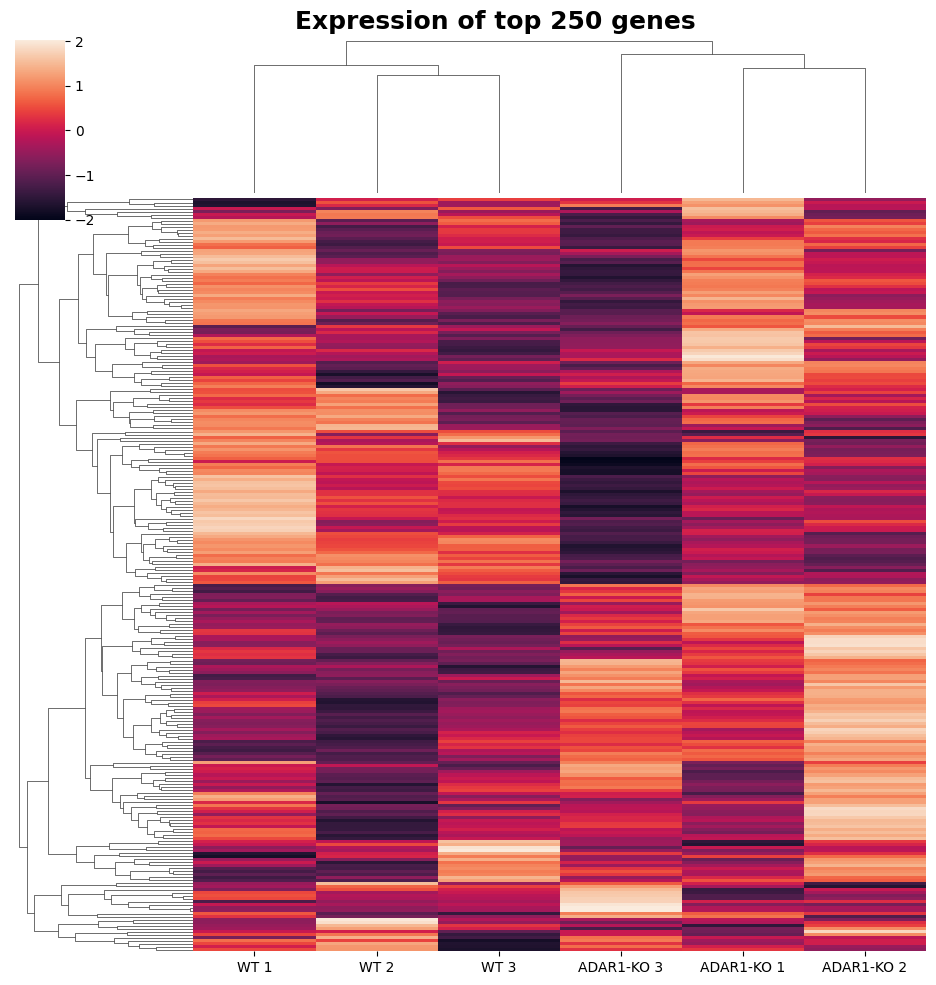

In [ ]:
import seaborn as sns

# Plot the data
cluster = ...

# Disable x axis labels
# hint: cluster.ax_heatmap is a simple matplotlib axis instance
...

# Add figure title
# hint: cluster.figure is a simple matplotlib figure
...

This is a nice example of variability that can be observed in real world biological data. However, in most cases such difference is not significant and just a random noise. Otherwise... It's useless.

For what popular RNA-seq analysis would such a figure be good supporting evidence? Insert an example image (using the link).

Your answer: `...`